<a href="https://colab.research.google.com/github/Prabhitha/FakeNewsDetection/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import os
import re
import numpy as np
import pandas as pd 
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


%matplotlib inline
sns.set(style="whitegrid")
colors = sns.color_palette()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#Read the data

true_label = pd.read_csv('drive/My Drive/Fake News Detection/True.csv')
fake_label = pd.read_csv('drive/My Drive/Fake News Detection/Fake.csv')
true_label['label'] = 'True'
fake_label['label'] = 'Fake'
#data = pd.concat([true_label[:100], fake_label[:100]], axis=0, ignore_index= True)
data = pd.concat([true_label, fake_label], axis=0, ignore_index= True)
data.count()

title      44898
text       44898
subject    44898
date       44898
label      44898
dtype: int64

In [ ]:
data.index.is_unique

True

In [ ]:
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [ ]:
data.tail()

,title,text,subject,date,label
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake


In [ ]:
data = data.sample(frac = 1)
data.head()

,title,text,subject,date,label
9690,"'Three Amigos' Obama, Trudeau, Pena Nieto to m...",WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"May 4, 2016",True
17228,"EU rebuffs British PM May, demands more conces...",LUXEMBOURG/LONDON (Reuters) - The European Uni...,worldnews,"October 17, 2017",True
25994,Donald Trump Panicking As Ugly Divorce Record...,It s no secret that Donald Trump is cruel to w...,News,"September 18, 2016",Fake
8783,"Responding to criticism, Trump calls on Justic...",WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"July 13, 2016",True
15129,"U.S.'s Tillerson concerned over Saudi purge, m...",WASHINGTON (Reuters) - Saudi Arabia s Crown Pr...,worldnews,"November 10, 2017",True


In [ ]:
data.drop('title', axis='columns', inplace=True)
data.drop('subject', axis='columns', inplace=True)
data.drop('date', axis='columns', inplace=True)
data.head()

,text,label
9690,WASHINGTON (Reuters) - U.S. President Barack O...,True
17228,LUXEMBOURG/LONDON (Reuters) - The European Uni...,True
25994,It s no secret that Donald Trump is cruel to w...,Fake
8783,WASHINGTON (Reuters) - U.S. Republican preside...,True
15129,WASHINGTON (Reuters) - Saudi Arabia s Crown Pr...,True


In [ ]:
data.shape

(44898, 2)

In [ ]:
data = data.dropna()
data.shape

(44898, 2)

In [ ]:
data['text'].values[0]

'WASHINGTON (Reuters) - U.S. President Barack Obama, Canadian Prime Minister Justin Trudeau and Mexican President Enrique Pena Nieto will meet in Ottawa for a North American leaders’ Summit on June 29, the White House said on Wednesday. The “Three Amigos” summit, with two key U.S. trading partners, comes as Obama grapples with a wave of anti-free-trade sentiment that has stalled ratification of the Trans-Pacific Partnership (TPP), a sweeping 12-nation pact that includes Canada and Mexico. Obama hopes the U.S. Congress will ratify the deal before he leaves office on Jan. 20. But trade has become a lightning rod issue in the presidential election campaign to replace him. Republican Donald Trump, now his party’s presumptive nominee for 2016, has attacked the TPP and describes the tripartite  North American Free Trade agreement as a disaster that needs to be renegotiated or broken. In the Democratic campaign, Senator Bernie Sanders has opposed the trade deal, and Democratic front-runner Hi

In [ ]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
data['label'].value_counts()

Fake    23481
True    21417
Name: label, dtype: int64

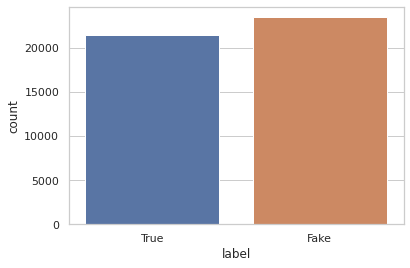

In [ ]:
sns.countplot(data['label'])

In [ ]:
# Encode target labels with a value between 0 and n_classes-1

scalar = LabelEncoder()
data['label'] = scalar.fit_transform(data['label'])

# Storing labels in array
labels = data['label'].values

# Splitting data into train and test sets in a 70/30 ratio
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, stratify=labels, random_state=42, test_size=0.3)

In [ ]:
train_data.head()

,text,label
37201,THIS FIRST-HAND ACCOUNT OF WHAT HAPPENED IN BA...,0
42829,"Meanwhile, most Americans can t afford to take...",0
27390,Despite his tough talk on international affair...,0
30523,Hell has frozen over! CNN is actually reportin...,0
18565,MADRID (Reuters) - The head of the Catalan reg...,1


In [ ]:
print('Train shape: {}'.format(train_data.shape))
print('Test shape: {}'.format(test_data.shape))

Train shape: (31428, 2)
Test shape: (13470, 2)


In [ ]:
symbols = train_data[train_data['text'].str.contains('%')]
symbols.values[1]
#'%','$','₹','€','@'  

array(['At some point, far in the future, former Minnesota Congresswoman Michele Bachmann will learn that she probably should stop expressing her opinion on any matter more complex than  which hole does the square peg fit in?  The Tea Party superstar s relevance has fizzled out over the years, with her base either dying off or ending up in prison for one gun-related crime or another   but this relic from the Hoveround Revolution still occasionally attempts to cling to her former stardom among the uneducated masses of the nation. Question: if 45% of Americans pay no federal income taxes, should they be allowed to vote?  she asked.Naturally, anyone whose intelligence is above the level required to operate a toaster without adult supervision mocked her relentlessly:     Why don t 45.3 percent of Americans pay federal income tax? They can t afford it, of course. Americans are underpaid and undervalued as the upper class continues to find every excuse possible to cut wages and profit off of

In [ ]:
# This function accepts a question and preprocesses it. Returns cleaned question.
def preprocess(q):
  # Firstly, we convert to lowercase and remove trailing and leading spaces
  q = str(q).lower().strip()

  # Replace certain special characters with their string equivalents
  q = q.replace('%', ' percent')
  q = q.replace('$', ' dollar ')
  q = q.replace('₹', ' rupee ')
  q = q.replace('€', ' euro ')
  q = q.replace('@', ' at ')

  # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
  q = q.replace(',000,000,000 ', 'b ')
  q = q.replace(',000,000 ', 'm ')
  q = q.replace(',000 ', 'k ')
  q = re.sub(r'([0-9]+)000000000', r'\1b', q)
  q = re.sub(r'([0-9]+)000000', r'\1m', q)
  q = re.sub(r'([0-9]+)000', r'\1k', q)

  # Decontracting words
  # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
  # https://stackoverflow.com/a/19794953
  contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
  }

  q_decontracted = []

  for word in q.split():
    if word in contractions:
      word = contractions[word]
  
    q_decontracted.append(word)

  q = ' '.join(q_decontracted)
  q = q.replace("'ve", " have")
  q = q.replace("n't", " not")
  q = q.replace("'re", " are")
  q = q.replace("'ll", " will")

  # Removing HTML tags
  q = BeautifulSoup(q)
  q = q.get_text()

  # Remove punctuations
  pattern = re.compile('\W')
  q = re.sub(pattern, ' ', q).strip()

  return q

In [ ]:
# Receives the news from one row in DataFrame
# Computes token features, removes stopwords and performs stemming
# Returns an array of shape (num_features,)
def get_token_features(q):

  # Getting NLTK stop words set
  stop_words = stopwords.words('english')

  # Initializing stemmer
  stemmer = PorterStemmer()

  # Tokenizing
  q = q.split()

  # Stop words in q
  q_stops = set([word for word in q if word in stop_words])

  # Removing stop words
  q = [word for word in q if word not in stop_words]

  # Stem
  q_stemmed = [stemmer.stem(word) for word in q]
  q_stemmed = ' '.join([word for word in q_stemmed])

  return q_stemmed

In [ ]:
# Receives data set and performs cleaning, feature extractions
# Transforms data set by adding feature columns
# Returns transformed DataFrame
def extract_features(data):
  # First, lets call the preprocess function on the text data
  data['text'] = data['text'].apply(preprocess)
  data['text'] = data['text'].apply(get_token_features)


  return data

In [ ]:
# To avoid doing preprocessing again and again, we will store the result

train_data = extract_features(train_data)
train_data.to_csv('/content/drive/My Drive/Fake News Detection/cleaned_featurized_train.csv', index=False)
np.save('/content/drive/My Drive/Fake News Detection/train_labels.npy', train_labels)


test_data = extract_features(test_data)
test_data.to_csv('/content/drive/My Drive/Fake News Detection/cleaned_featurized_test.csv', index=False)
np.save('/content/drive/My Drive/Fake News Detection/test_labels.npy', test_labels)

In [ ]:
print(train_data.shape)
train_data.head()

(31428, 2)


,text,label
37201,first hand account happen baltimor shock unrea...,0
42829,meanwhil american afford take singl vacat judi...,0
27390,despit tough talk intern affair slam democrat ...,0
30523,hell frozen cnn actual report truth cnn legal ...,0
18565,madrid reuter head catalan region govern sunda...,1


In [ ]:
print(test_data.shape)
test_data.head()

(13470, 2)


,text,label
44218,tune altern current radio network acr week bro...,0
10661,washington reuter presid barack obama conven m...,1
39865,tucker carlson jess water went triniti colleg ...,0
884,washington reuter presid donald trump announc ...,1
33391,muslim men flex muscl franc use special penal ...,0


### Word clouds for True and Fake data

In [ ]:
# Splitting using class label
true = train_data[train_data['label']==1]
fake = train_data[train_data['label']==0]

# Flattening to get 1D array
true = np.array([true['text']]).flatten()
fake = np.array([fake['text']]).flatten()

# Converting into one single string for word cloud
true_str = ' '.join(true)
fake_str = ' '.join(fake)

# Creating stopwords set, we use the same set we did while preprocessing
# Technically, this shouldnt change anything as we have already filtered the sentences
stop_words = set(stopwords.words('english'))

Word cloud for True News


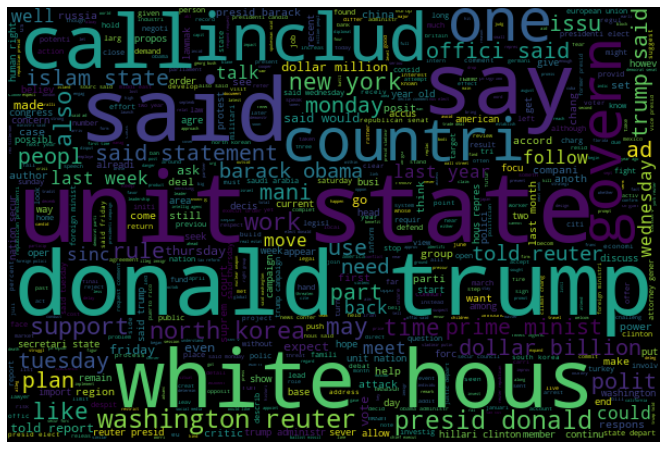

In [ ]:
# Generate True pair word cloud
word_cloud = WordCloud(background_color='black', max_words=len(true_str), stopwords=stop_words, width=600, height=400)
word_cloud.generate(true_str)

print('Word cloud for True News')
plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

Word cloud for Fake News


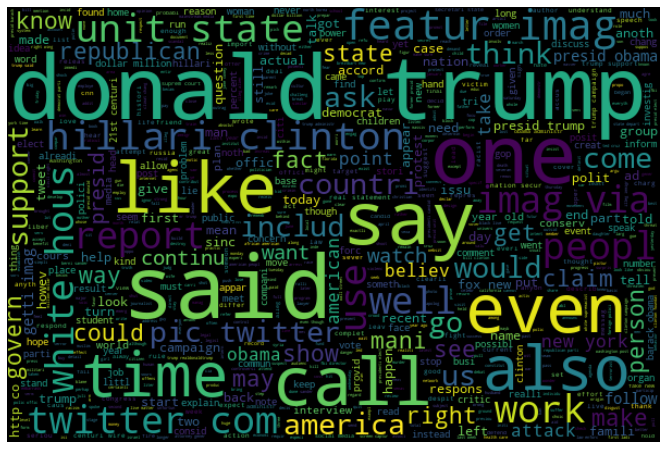

In [ ]:
# Generate Fake pair word cloud
word_cloud = WordCloud(background_color='black', max_words=len(fake_str), stopwords=stop_words, width=600, height=400)
word_cloud.generate(fake_str)

print('Word cloud for Fake News')
plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()